In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler,OneHotEncoder
from google.colab import drive
import os

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
folder_path = '/content/drive/My Drive/DA notebooks/Dataset'
file_name = 'application_data.csv'
file_path = os.path.join(folder_path, file_name)

In [10]:
df = pd.read_csv(file_path)

In [11]:
print(df.info())
print('================================================')
print(df.describe())
print('================================================')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.

In [12]:
len(df.columns)

122

In [13]:
numerical_df = df.select_dtypes(include=['number'])
categorical_df = df.select_dtypes(include=['object', 'category'])


In [14]:
categorical_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [16]:
for col in numerical_df.columns:
    plt.figure(figsize=(18, 6))  # Increase width for 3 subplots

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(numerical_df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=numerical_df[col])
    plt.title(f'Box plot of {col}')

    # # Scatter plot
    # plt.subplot(1, 3, 3)
    # sns.scatterplot(x=numerical_df.index, y=numerical_df[col])
    # plt.title(f'Scatter plot of {col}')
    # plt.xlabel('Index')
    # plt.ylabel(col)

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
skewness = numerical_df.skew()
print(skewness)

SK_ID_CURR                     -0.001200
TARGET                          3.078159
CNT_CHILDREN                    1.974604
AMT_INCOME_TOTAL              391.559654
AMT_CREDIT                      1.234778
                                 ...    
AMT_REQ_CREDIT_BUREAU_DAY      27.043505
AMT_REQ_CREDIT_BUREAU_WEEK      9.293573
AMT_REQ_CREDIT_BUREAU_MON       7.804848
AMT_REQ_CREDIT_BUREAU_QRT     134.365776
AMT_REQ_CREDIT_BUREAU_YEAR      1.243590
Length: 106, dtype: float64


In [18]:
skew_threshold = 0.5

skewness = numerical_df.skew()

# Categorize columns based on skewness
numerical_columns_standard = skewness[abs(skewness) <= skew_threshold].index.tolist()
numerical_columns_robust = skewness[abs(skewness) > skew_threshold].index.tolist()

print("Columns for StandardScaler:", numerical_columns_standard)
print("Columns for RobustScaler:", numerical_columns_robust)

Columns for StandardScaler: ['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_3']
Columns for RobustScaler: ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BA

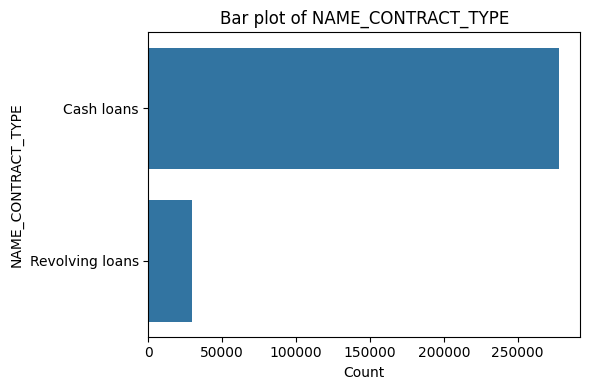

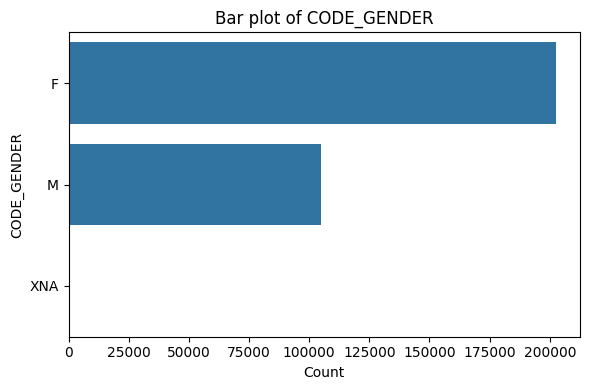

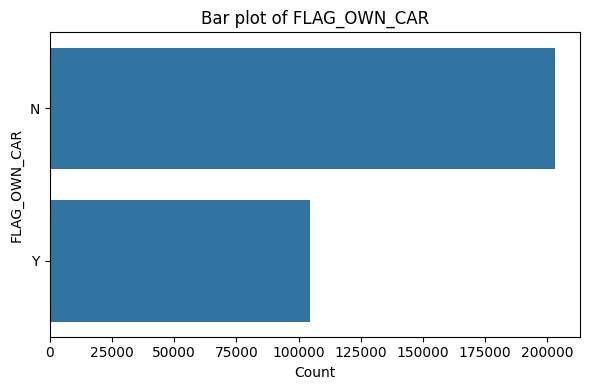

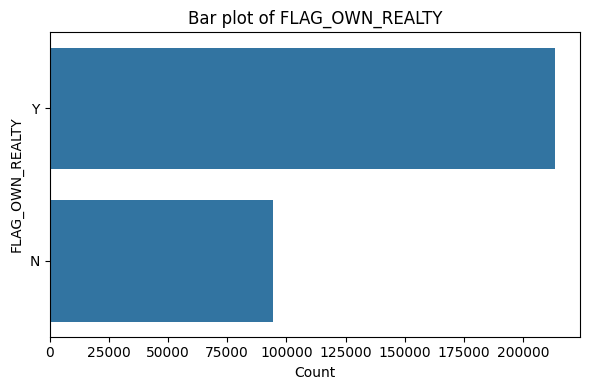

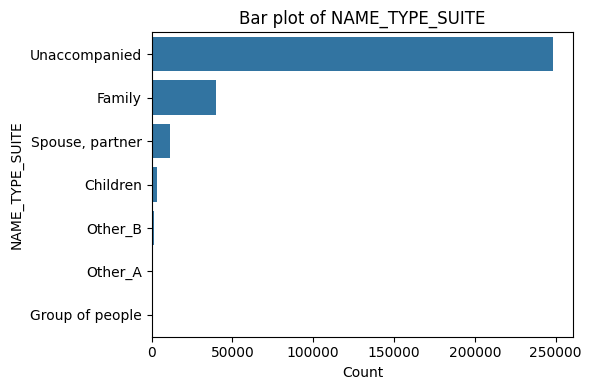

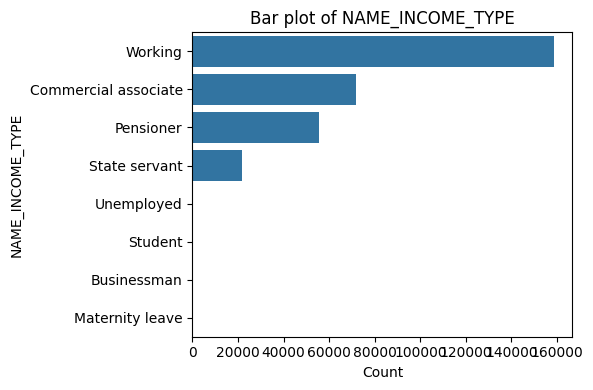

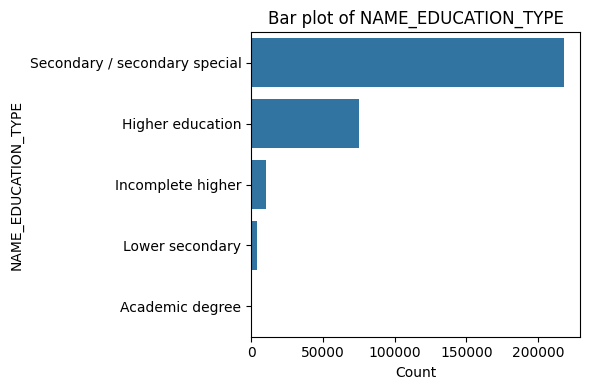

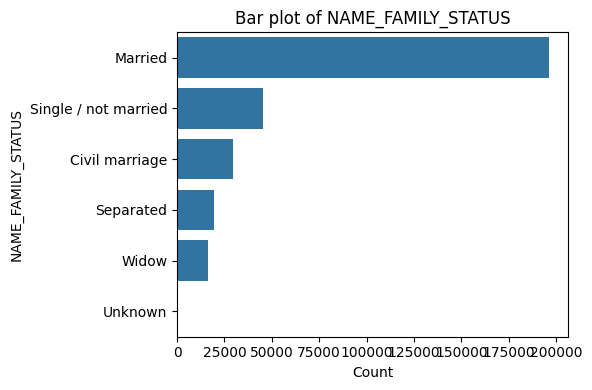

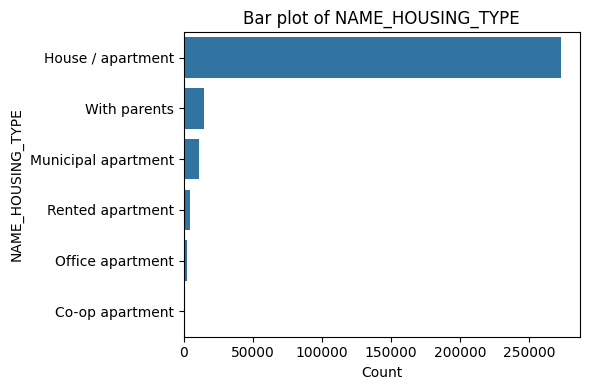

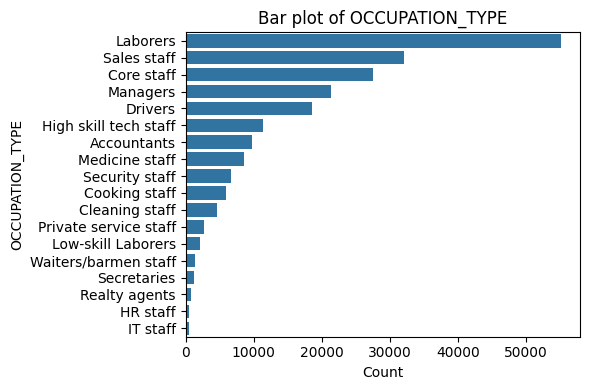

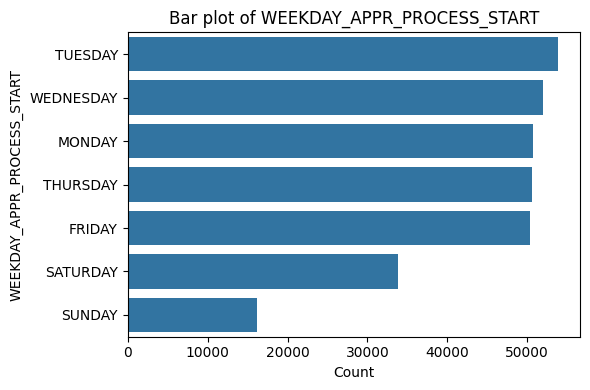

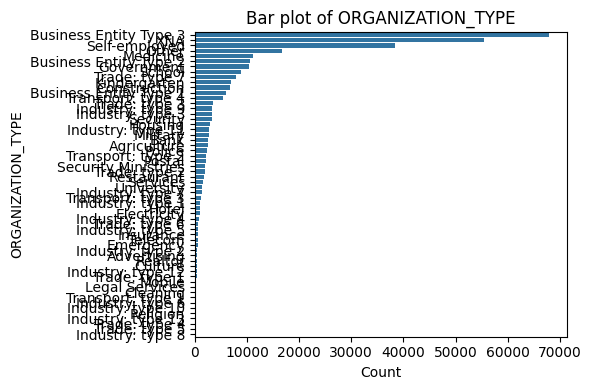

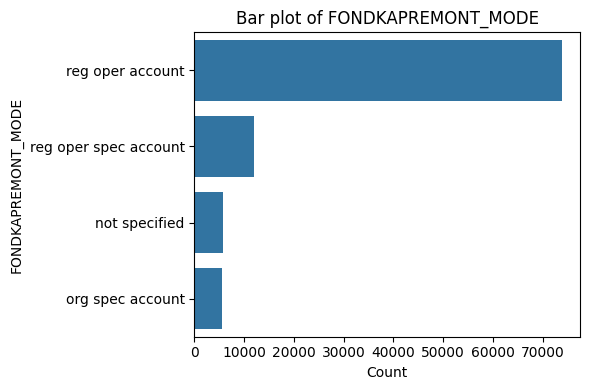

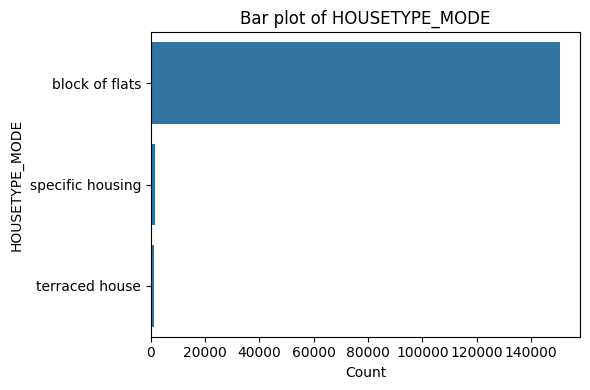

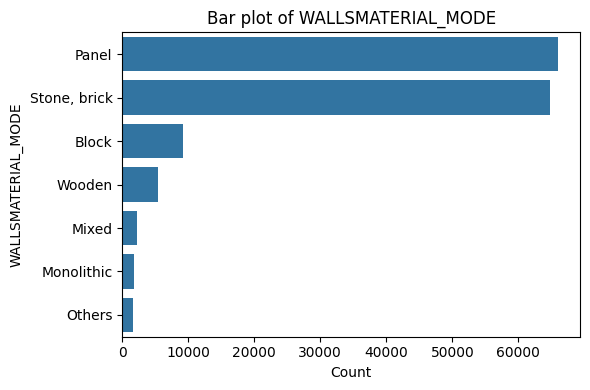

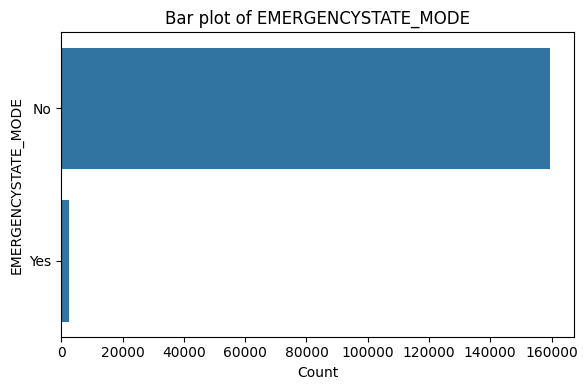

In [19]:
for col in categorical_df.columns:
    plt.figure(figsize=(6, 4))

    sns.countplot(y=categorical_df[col], order=categorical_df[col].value_counts().index)
    plt.title(f'Bar plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

In [20]:
categorical_df = df.select_dtypes(include=['object', 'category']).columns  # Select categorical columns

unique_values = df[categorical_df].nunique()

print(unique_values)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64


In [21]:
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
# IterativeImputer
# imputer choices

# Mean imputation
'''
Use Case: Filling in missing values in a dataset with a normally distributed numerical feature.

Example:
Suppose you have a dataset of house prices and the house_size feature has some missing values.
If the distribution of house_size is roughly normal, mean imputation can be used to fill in these missing values.

python
'''

mean_imputer = SimpleImputer(strategy='mean')

# Median imputation
'''
Use Case: Filling in missing values in a dataset with a skewed numerical feature.

Example:
Consider a dataset of household incomes where the income feature has a right-skewed distribution
(a few high-income households pull the mean up). Median imputation is more robust to outliers and is
appropriate for such skewed data.
'''
median_imputer = SimpleImputer(strategy='median')

# Most frequent imputation
'''
Most Frequent Imputation
Use Case: Filling in missing values in a categorical feature or a feature with many repeated values.

Example:
Consider a dataset of survey responses where the marital_status feature has some missing values.
The most frequent imputation is suitable for categorical data like marital_status, where the missing
values can be replaced with the most common category.
'''
most_frequent_imputer = SimpleImputer(strategy='most_frequent')

# Constant imputation
'''
Constant Imputation
Use Case: Filling in missing values with a specific constant value, useful for categorical features where
missing values represent a distinct category.

Example:
In a dataset of customer profiles, the subscription_type feature has some missing values. If missing values
 should be treated as a distinct category (e.g., unknown), constant imputation is appropriate.
'''
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

'''
KNNImputer
Use Case: When you want to impute missing values based on the similarity between instances.
This is useful when the data points with missing values are similar to other data points that can
provide relevant information for imputation.
'''

knn_imputer = KNNImputer(n_neighbors=3)

'''
IterativeImputer
Use Case: When you need a sophisticated imputation method that models each feature as a function of other features.
This is useful for datasets where missing values can be estimated by considering multiple features simultaneously.
'''
# iterative_imputer = IterativeImputer()

'''
MissingIndicator
Use Case: When you want to include information about which values were missing as a feature in your model.
This can be useful for models that may benefit from knowing whether data was missing.
'''
missing_indicator = MissingIndicator()

In [22]:
numerical_transformer_standard = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numerical_transformer_robust = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(drop='first'))
])


In [23]:
numerical_data_preprocessed_standard = numerical_transformer_standard.fit_transform(df[numerical_columns_standard])
numerical_data_preprocessed_standard.shape

(307511, 8)

In [24]:
numerical_data_preprocessed_robust = numerical_transformer_robust.fit_transform(df[numerical_columns_robust])
numerical_data_preprocessed_robust.shape

(307511, 98)

In [25]:
categorical_data_preprocessed = categorical_transformer.fit_transform(df[categorical_df])
categorical_data_preprocessed.shape

(307511, 130)

In [26]:
numerical_data_preprocessed_standard_df = pd.DataFrame(
    numerical_data_preprocessed_standard,
    columns=numerical_columns_standard,
    index=df.index
)

numerical_data_preprocessed_robust_df = pd.DataFrame(
    numerical_data_preprocessed_robust,
    columns=numerical_columns_robust,
    index=df.index
)

# apply one-hot encoding
categorical_data_preprocessed_df = pd.DataFrame(
    categorical_data_preprocessed.toarray(),
    columns=categorical_transformer.named_steps['onehot'].get_feature_names_out(df[categorical_df].columns),  # Get new one-hot encoded column names
    index=df.index  # Maintain the original index
)

df_preprocessed = pd.concat(
    [numerical_data_preprocessed_standard_df, numerical_data_preprocessed_robust_df, categorical_data_preprocessed_df],
    axis=1
)


In [27]:
df_preprocessed

,SK_ID_CURR,DAYS_BIRTH,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_3,TARGET,CNT_CHILDREN,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_missing_value,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_missing_value
0,-1.733423,1.506880,0.579154,-0.103064,-0.062699,-0.631821,-3.006518e+00,-2.129249,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.733413,-0.166821,1.790855,-2.067573,-2.051813,-0.325620,-1.369223e+00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.733403,-0.689509,0.306869,-0.103064,-0.062699,-0.938022,7.964597e-16,1.253633,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-1.733384,-0.680114,0.369143,-0.103064,-0.062699,1.511587,7.964597e-16,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-1.733374,-0.892535,-0.307263,-0.103064,-0.062699,-0.325620,7.964597e-16,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.732372,1.537586,0.670578,-2.067573,-2.051813,0.899185,-2.557911e+00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
307507,1.732381,-1.085707,-0.725959,-0.103064,-0.062699,-1.244224,7.964597e-16,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
307508,1.732391,0.245417,-1.428203,1.861445,1.926416,-0.938022,1.735335e+00,-1.673663,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
307509,1.732401,0.934008,1.366859,-0.103064,-0.062699,-0.938022,7.964597e-16,0.860755,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [29]:
df_preprocessed.shape

(307511, 236)

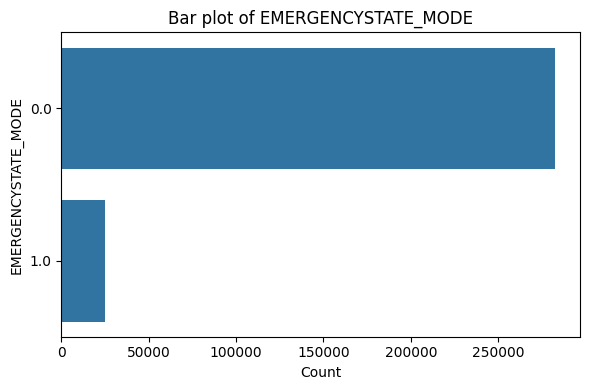

In [30]:
plt.figure(figsize=(6, 4))

sns.countplot(y=df_preprocessed['TARGET'], order=df_preprocessed['TARGET'].value_counts().index)
plt.title(f'Bar plot of {col}')
plt.xlabel('Count')
plt.ylabel(col)

plt.tight_layout()
plt.show()

In [31]:
print(len(df_preprocessed[df_preprocessed["TARGET"] == 0]))
print(len(df_preprocessed[df_preprocessed["TARGET"] == 1]))

282686
24825


In [32]:
folder_path = '/content/drive/My Drive/DA notebooks/Dataset'
file_name = 'applications_processed_data.csv'
file_path = os.path.join(folder_path, file_name)


In [33]:
df_preprocessed.to_csv(file_path, index=False)